# Research on apartment sales ads

Here we are using the data from a real estate agency. It is an archive of sales ads for realty in St. Petersburg, Russia, and the surrounding areas collected over the past few years. We will use this data to determine the market value of real estate properties. The task is to define the parameters. This will make it possible to build an automated system that is capable of detecting anomalies and fraudulent activity.

There are two different types of data available for every apartment for sale. The first type is a user’s input. The second type is received automatically based upon the map data. For example, the distance from the downtown area, airport, the nearest park or body of water. 

### Step 1. Open the data file and study the general information. 

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/datasets/real_estate_data_eng.csv', sep='\t')

The .csv data file is separated with \t instead of commas, which prompts the use of the *sep* parameter.

In [ ]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Saint Peterburg,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,Shushary village,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Saint Peterburg,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Saint Peterburg,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Saint Peterburg,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [ ]:
df['locality_name'].value_counts()

Saint Peterburg             15721
Murino village                556
Shushary village              440
Vsevolozhsk                   398
Pushkin                       369
                            ...  
Stare Khinkolovo village        1
Rebrovo village                 1
Kurovitsy village               1
village Vakhnova Kara           1
Zelyony Bor village             1
Name: locality_name, Length: 341, dtype: int64

### Conclusion

Columns `ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`, `locality_name`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `days_exposition` contain null entries.

Float64 columns `last_price`, `total_area`, `floors_total`, `living_area`, `balcony`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, and `days_exposition` all contain values that are normally regarded as whole numbers in this context and would best converted into int64 columns.

Object column `first_day_exposition` contains date values. This column would best be converted into a datetime64 column.

Object column `is_apartment` is a legacy column which contains Boolean types. Although this column does not convey any important information in the data's current state, the column type should still be converted into Boolean form for continuity's sake.

`locality_name` contains strings written in varying cases and may contain duplicates. It is a good idea to check for leading and trailing whitespaces.

### Step 2. Data preprocessing

#### Replacing missing values

In [ ]:
df[df['balcony'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Saint Peterburg,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Saint Peterburg,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,Yanino village,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,Murino village,NaN,NaN,NaN,NaN,NaN,NaN,189.0
10,5,5050000.0,39.60,2017-11-16T00:00:00,1,2.67,12.0,20.30,3,NaN,...,8.50,NaN,Saint Peterburg,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0


In [ ]:
df['balcony'] = df['balcony'].fillna(value=0)

Missing values in `balcony` are filled with the value 0. If the user does not enter the number of balconies, it is likely to be 0.

In [ ]:
df['is_apartment'] = True

All listings in this dataset are apartments, so null values are filled in accordingly.

In [ ]:
df['locality_name'] = df['locality_name'].str.strip()

In [ ]:
df['locality_name'].value_counts()

Saint Peterburg           15721
Murino village              556
Shushary village            440
Vsevolozhsk                 398
Pushkin                     369
                          ...  
Ploskoe village               1
Rabititsky village            1
Semiozerye village            1
Privetninskoye village        1
Zelyony Bor village           1
Name: locality_name, Length: 335, dtype: int64

In [ ]:
df['locality_name'] = df['locality_name'].fillna(value='Unknown')

Null locality values are filled in the word "Unknown" since it is difficult to make an accurate estimate on what the actual locality name is.

In [ ]:
df[df['living_area'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,True,...,NaN,0.0,Saint Peterburg,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,True,...,18.9,2.0,Saint Peterburg,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,True,...,NaN,0.0,Kommunar,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.5,5.0,NaN,1,True,...,NaN,0.0,village Krasny Bor,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,NaN,22.0,NaN,3,True,...,NaN,1.0,Saint Peterburg,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN


In [ ]:
df['living_area'].fillna(-1, inplace=True)

In [ ]:
df['kitchen_area'].fillna(-1, inplace=True)

Null `living_area` and `kitchen_area` values are replaced with "-1", since there are insufficient baseline values available to make an estimate.

In [ ]:
df['floors_total'].fillna(-1, inplace=True)

Null `floors_total` values are also given the value "-1" because it is difficult to accurately determine the correct amount of floors for a specific listing, especially when a locality contains both tall and short buildings.

In [ ]:
map_data = ['ponds_around3000', 'parks_around3000', 'cityCenters_nearest', 'airports_nearest', 'ponds_nearest', 'parks_nearest']
for column in map_data:
    df[column] = df[column].fillna(value=0)
    df[column] = df[column].astype(int)

Values in `ponds_around3000`, `parks_around3000`, `cityCenters_nearest`, `airports_nearest`, `ponds_nearest`, and `parks_nearest` are obtained automatically based on the map data. When the value returned is null, it could mean that there are no locations nearby. Therefore, missing values are filled in with 0's and the columns are then converted into integer type columns, since these values are normally counted as whole numbers.

#### Converting data to the required types

In [ ]:
df['balcony'] = df['balcony'].astype(int)

In [ ]:
df['last_price'] = df['last_price'].astype(int)

In [ ]:
df['living_area'] = df['living_area'].astype(int)

In [ ]:
df['kitchen_area'] = df['kitchen_area'].astype(int)

In [ ]:
df['floors_total'] = df['floors_total'].astype(int)

The `balcony`, `last_price`, `living_area`, `kitchen_area`, and `floors_total` columns are converted from float64 to int64 because these values are typically counted using whole numbers.

In [ ]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

`first_day_exposition` is converted from an object column type to a datetime column type since it contains date stamps. Doing this will make the column a little easier to work with.

### Conclusion

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null int64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null int64
balcony                 23699 non-null int64
locality_name           23699 non-null object
airports_nearest        23699 non-null int64
cityCenters_nearest     23699 non-null int64
parks_around3000        23699 non-null int64
parks_nearest           23699 non-null int64
ponds_around3000        2

A total of 12 columns containing null values were filled in with appropriate replacements. 12 columns were also converted into their appropriate data type, following the replacement of null values.

Null values in `days_exposition` and `ceiling_height` were kept blank to avoid distorting mean and median data.

### Step 3. Make calculations and add them to the table

In [ ]:
df['price_per_sq_m'] = df['last_price'] / df['total_area']

In [ ]:
df['price_per_sq_m'] = df['price_per_sq_m'].astype(int)

Price per square meter is typically displayed as whole numbers on real estate listings, so the column type is converted from a float to an integer.

In [ ]:
df['day_published'] = df['first_day_exposition'].dt.weekday

In [ ]:
df['month_published'] = df['first_day_exposition'].dt.month

In [ ]:
df['year_published'] = df['first_day_exposition'].dt.year

In [ ]:
def assign_floors(df):
    if df['floor'] == 1:
        return "first"
    elif df['floors_total'] == df['floor']:
        return "last"
    else:
        return "other"

df['floor_position'] = df.apply(assign_floors, axis=1)

In [ ]:
df['living_to_total_ratio'] = df['living_area'] / df['total_area']

In [ ]:
df['kitchen_to_total_ratio'] = df['kitchen_area'] / df['total_area']

Negative ratios in `living_to_total_ratio` and `kitchen_to_total_ratio` indicate a missing value for either the living area or the kitchen area, respectively.

### Conclusion

7 new columns were added during this step.

`price_per_sq_m` was calculated by dividing the price at the time when the ad was removed by the total area of the listing in square meters. 

The values in `day_published`, `month_published`, and `year_published` were derived from the `first_day_exposition` column. 

The value for `floor_position` was obtained by comparing the apartment's floor number with the total number of floors in the building. 

The values in `living_to_total_ratio` and `kitchen_to_total_ratio` were obtained by dividing the living area and kitchen area by the total area, respectively.

### Step 4. Conduct exploratory data analysis:

#### Investigating `last_price`, `total_area`, `rooms`, and `ceiling_height`

In [ ]:
df[['last_price', 'total_area', 'rooms', 'ceiling_height']].describe()

,last_price,total_area,rooms,ceiling_height
count,2.369900e+04,23699.000000,23699.000000,14504.000000
mean,6.541549e+06,60.348651,2.070636,2.771499
std,1.088701e+07,35.654083,1.078405,1.261056
min,1.219000e+04,12.000000,0.000000,1.000000
25%,3.400000e+06,40.000000,1.000000,2.520000
50%,4.650000e+06,52.000000,2.000000,2.650000
75%,6.800000e+06,69.900000,3.000000,2.800000
max,7.630000e+08,900.000000,19.000000,100.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f46774b4a10>,
      dtype=object)

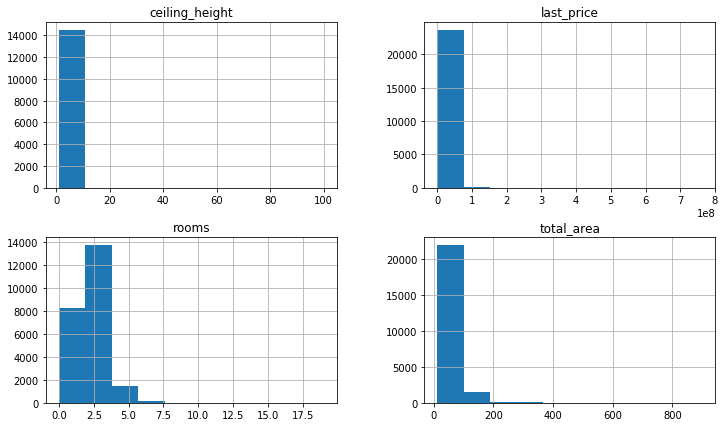

In [ ]:
df[['last_price', 'total_area', 'rooms', 'ceiling_height']].hist(figsize=(12,7))

In [ ]:
df['total_area'].value_counts()

45.00     419
42.00     383
60.00     347
31.00     346
44.00     345
         ... 
45.85       1
44.18       1
59.83       1
127.20      1
23.55       1
Name: total_area, Length: 2182, dtype: int64

In [ ]:
df['last_price'].value_counts()

4500000     342
3500000     291
4300000     260
4000000     260
4200000     259
           ... 
3247000       1
8555400       1
11748225      1
2182000       1
12288000      1
Name: last_price, Length: 2978, dtype: int64

In [ ]:
df['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

In [ ]:
df['ceiling_height'].value_counts()

2.50      3515
2.60      1646
2.70      1574
3.00      1112
2.80       993
          ... 
27.50        1
5.00         1
3.59         1
4.80         1
100.00       1
Name: ceiling_height, Length: 183, dtype: int64

#### Examining the time it takes to complete a sale

In [ ]:
df['days_exposition'].value_counts()

45.0      880
60.0      538
7.0       234
30.0      208
90.0      204
         ... 
1110.0      1
1049.0      1
951.0       1
693.0       1
773.0       1
Name: days_exposition, Length: 1141, dtype: int64

In [ ]:
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

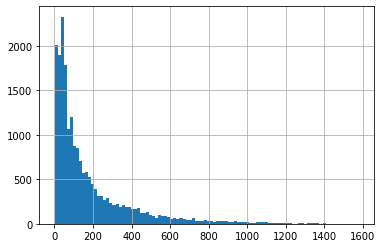

In [ ]:
df['days_exposition'].hist(bins=100)

In [ ]:
df.loc[df['days_exposition'] > 1100]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_m,day_published,month_published,year_published,floor_position,living_to_total_ratio,kitchen_to_total_ratio
353,4,5990000,43.5,2015-05-08,1,3.00,5,25,4,True,...,0,0,1292.0,137701,4,5,2015,other,0.574713,0.206897
398,7,12789000,79.3,2014-12-09,2,3.00,8,43,5,True,...,0,0,1345.0,161273,1,12,2014,other,0.542245,0.214376
437,12,3350000,37.0,2015-02-24,1,2.55,6,17,6,True,...,1,755,1273.0,90540,1,2,2015,last,0.459459,0.216216
459,13,5200000,51.0,2016-03-02,2,2.55,9,32,5,True,...,0,0,1153.0,101960,2,3,2016,other,0.627451,0.117647
512,8,6260000,43.3,2014-12-09,1,NaN,8,-1,5,True,...,3,303,1155.0,144572,1,12,2014,other,-0.023095,-0.023095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23055,8,3200000,33.0,2016-03-18,1,NaN,24,13,3,True,...,1,351,1130.0,96969,4,3,2016,other,0.393939,0.272727
23212,9,7515162,58.8,2015-03-10,2,NaN,10,30,3,True,...,1,434,1239.0,127808,1,3,2015,other,0.510204,0.187075
23248,5,4900000,80.0,2014-12-25,3,NaN,15,47,14,True,...,0,0,1187.0,61250,3,12,2014,other,0.587500,0.112500
23318,6,5620020,82.3,2015-03-10,3,2.70,21,45,12,True,...,1,31,1200.0,68286,1,3,2015,other,0.546780,0.182260


In [ ]:
df.loc[df['days_exposition'] < 4]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_m,day_published,month_published,year_published,floor_position,living_to_total_ratio,kitchen_to_total_ratio
294,20,3850000,37.0,2018-10-14,1,2.50,16,18,15,True,...,0,0,3.0,104054,6,10,2018,other,0.486486,0.216216
582,13,3500000,38.0,2017-07-10,2,NaN,9,-1,8,True,...,0,0,3.0,92105,0,7,2017,other,-0.026316,-0.026316
952,0,3800000,37.7,2017-09-10,1,NaN,24,17,2,True,...,0,0,3.0,100795,6,9,2017,other,0.450928,0.291777
1298,8,5148000,42.9,2018-12-10,1,2.75,11,14,3,True,...,2,466,3.0,120000,0,12,2018,other,0.326340,0.326340
1416,4,4740000,56.0,2017-09-10,3,NaN,9,36,2,True,...,0,0,3.0,84642,6,9,2017,other,0.642857,0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23011,13,3800000,44.0,2017-07-14,2,2.55,9,27,6,True,...,1,433,3.0,86363,4,7,2017,other,0.613636,0.136364
23116,10,14600000,105.0,2018-08-31,3,2.50,14,47,14,True,...,0,0,3.0,139047,4,8,2018,last,0.447619,0.209524
23144,10,3790000,43.9,2017-11-10,2,NaN,5,27,5,True,...,0,0,3.0,86332,4,11,2017,last,0.615034,0.159453
23371,0,5900000,45.0,2018-08-08,2,NaN,5,27,3,True,...,0,0,3.0,131111,2,8,2018,other,0.600000,0.133333


Based on the histogram, a sale can be considered extra fast when a listing's time on the market is less than 4 days, and extra slow when a listing's time on the market has surpassed 1100 days. These listings each comprise 0.6% of the data frame.

A possible reason for a listing to be taken off the market extra early may be because the seller has decided not to sell anymore. A possible reason for a listing to be taken off the market extra late may be due to complications with the selling process.

#### Removing rare and outlying values

In [ ]:
df.drop(df.loc[(df['days_exposition'] < 4) | (df['days_exposition'] > 1100)].index, inplace=True)

In [ ]:
df = df.reset_index(drop=True)

In order to more accurately research apartment sales, it is best to remove outlying values which may have not actually resulted in a sale caused by complications.

##### Examining which factors have had the biggest influence on an apartment’s value

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4677134c50>,
      dtype=object)

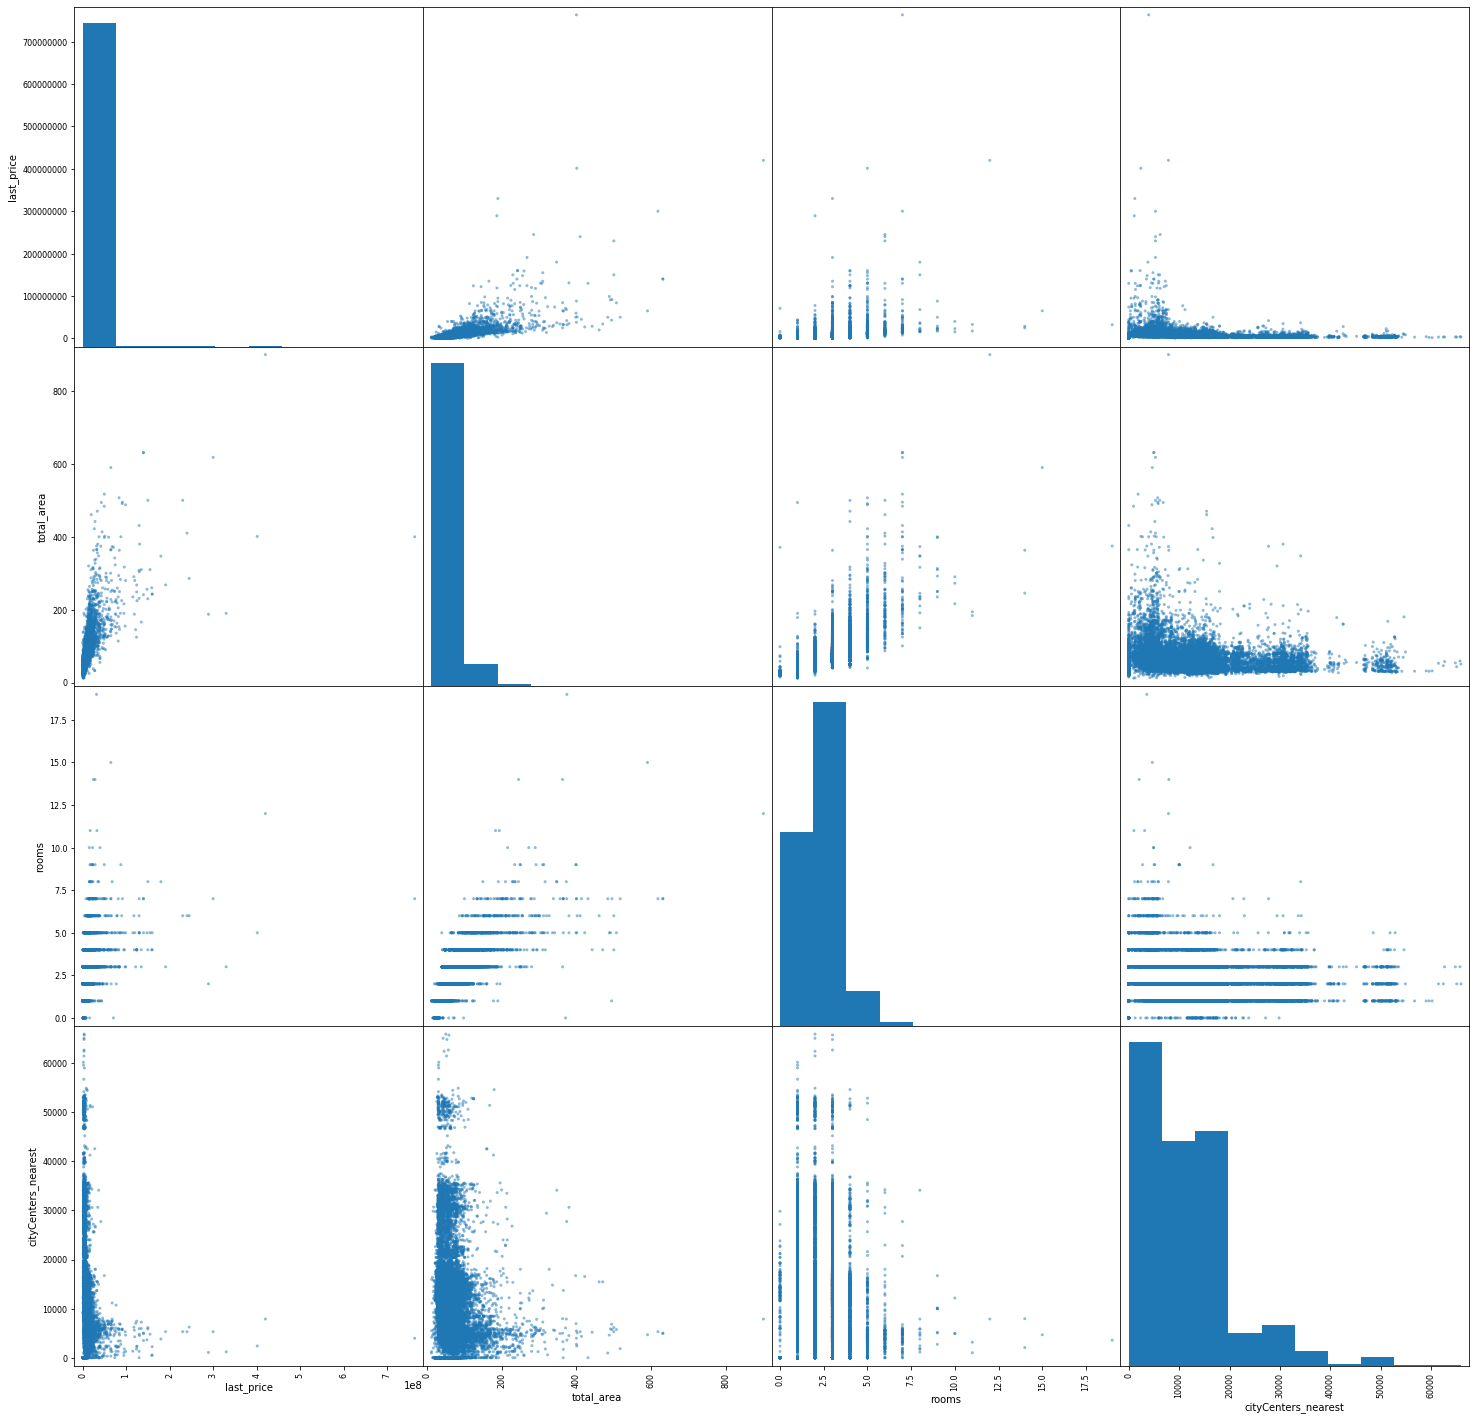

In [ ]:
pd.plotting.scatter_matrix(df[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']], figsize=(25,25), alpha=0.5)

In [ ]:
df[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.653578,0.362666,-0.050361
total_area,0.653578,1.000000,0.757941,-0.077169
rooms,0.362666,0.757941,1.000000,-0.059822
cityCenters_nearest,-0.050361,-0.077169,-0.059822,1.000000


The larger the `total_area`, the greater the `last_price` tends to be. Also, the greater the `rooms` in a listing, the greater the `last_price` tends to be. Listings closer to the city center also have higher `last_price` values.

`total_area` has the greatest correlation with `last_price` between these three columns.

In [ ]:
df.pivot_table(index='floor_position', values='last_price', aggfunc=['count', 'mean', 'median'])

,count,mean,median
,last_price,last_price,last_price
floor_position,,,
first,2887,4.797397e+06,3900000
last,3288,7.370967e+06,4300000
other,17199,6.663385e+06,4800227


The higher up an apartment is in a building, the higher the price tends to be.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4676aa6150>,
      dtype=object)

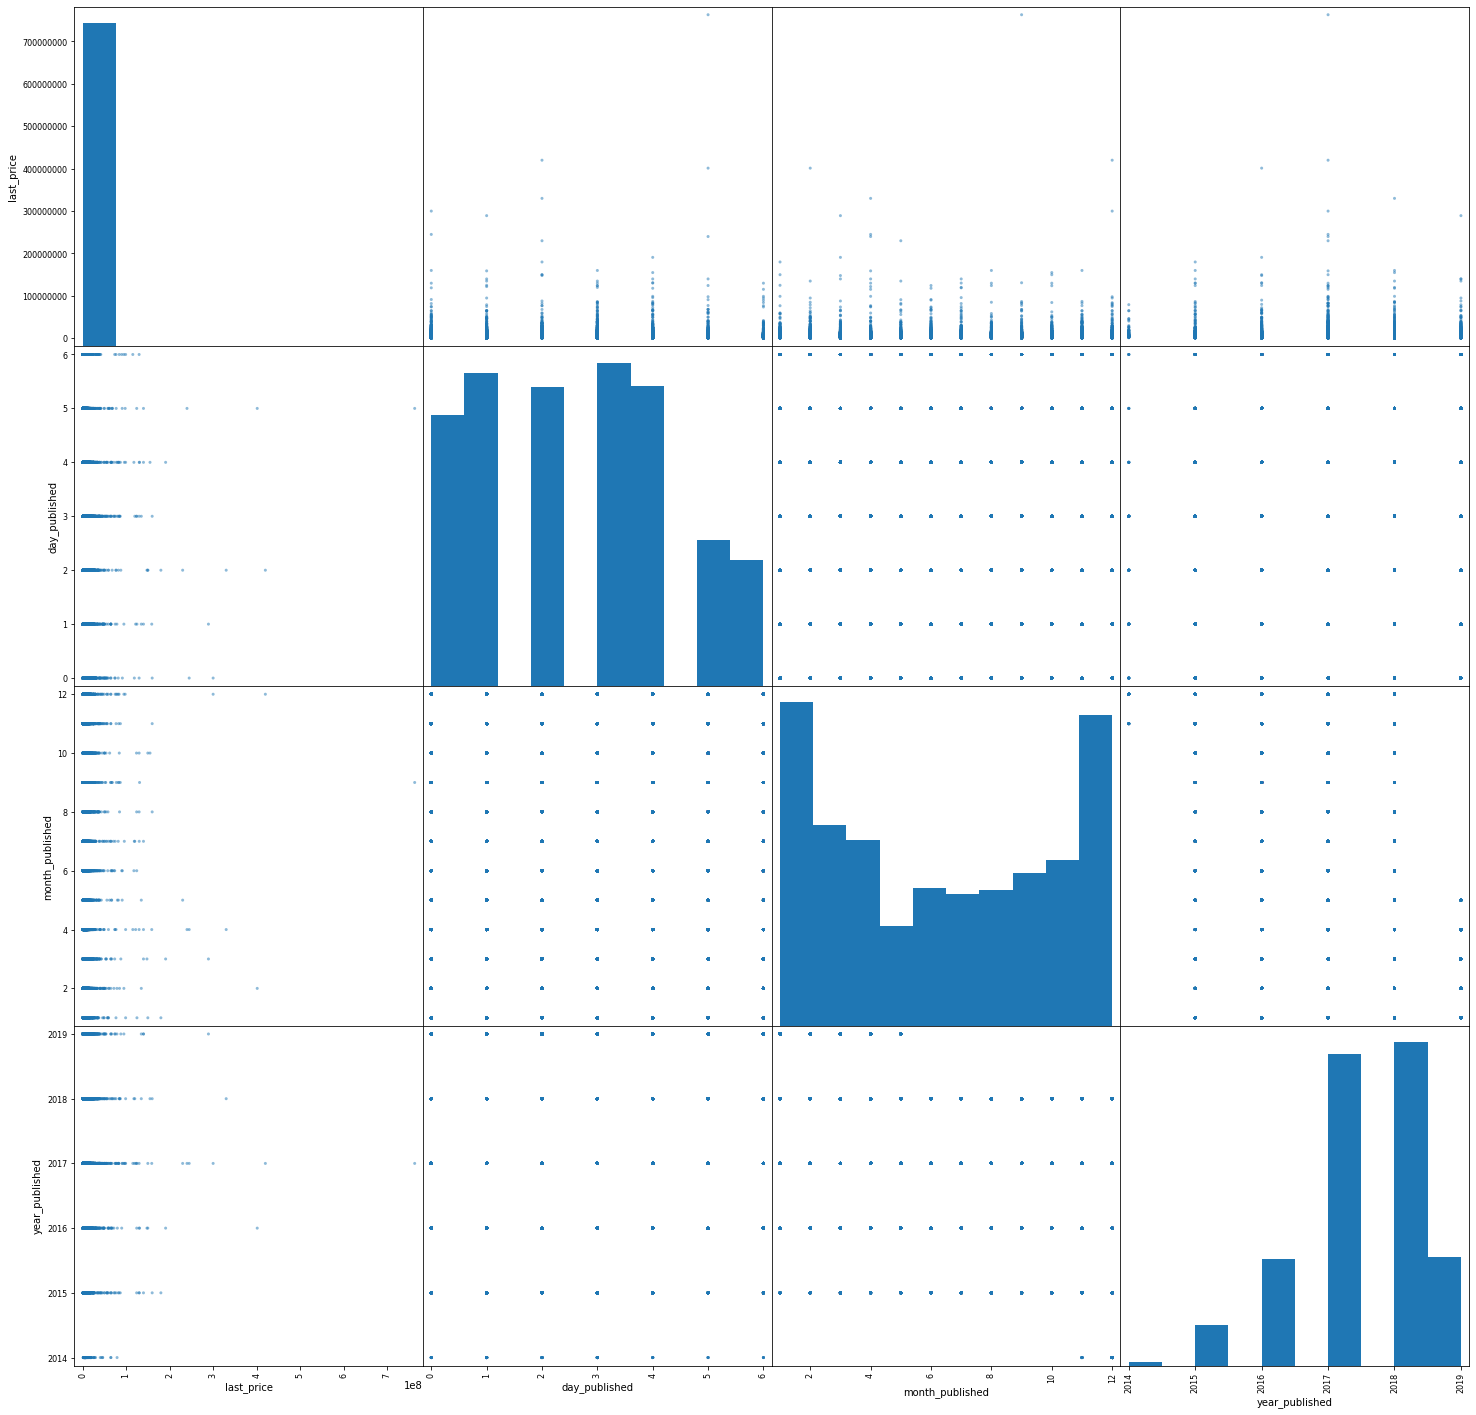

In [ ]:
pd.plotting.scatter_matrix(df[['last_price', 'day_published', 'month_published', 'year_published']], figsize=(25,25), alpha=0.5)

In [ ]:
df[['last_price', 'day_published', 'month_published', 'year_published']].corr()

,last_price,day_published,month_published,year_published
last_price,1.000000,0.002231,0.002413,-0.039159
day_published,0.002231,1.000000,0.009645,-0.008482
month_published,0.002413,0.009645,1.000000,-0.271883
year_published,-0.039159,-0.008482,-0.271883,1.000000


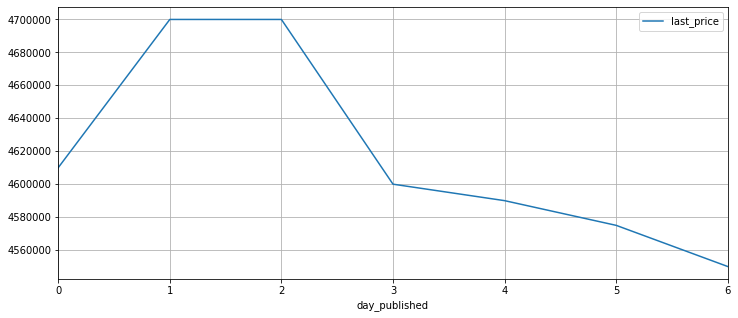

In [ ]:
df.pivot_table(index=['day_published'], values='last_price', aggfunc='median').plot(grid=True, figsize=(12, 5))

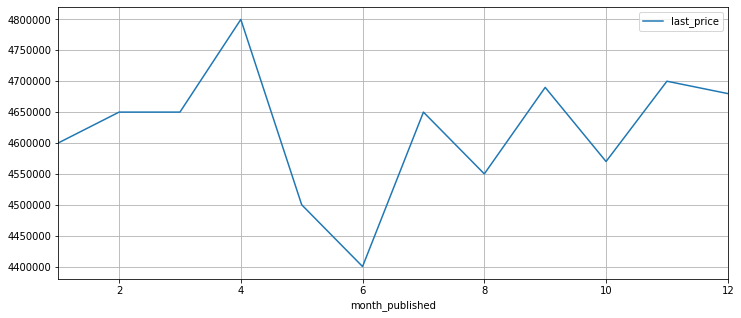

In [ ]:
df.pivot_table(index='month_published', values='last_price', aggfunc='median').plot(grid=True, figsize=(12, 5))

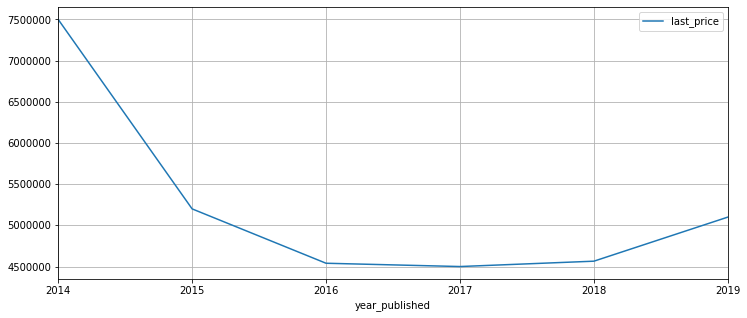

In [ ]:
df.pivot_table(index='year_published', values='last_price', aggfunc='median').plot(grid=True, figsize=(12, 5))

There was a dip in prices during 2016-2018. There is little correlation between the price and the days/weeks published.

#### Studying the 10 places with the largest number of ads and the the average price per square meter in these localities, as well as the locations with the highest and lowest housing prices

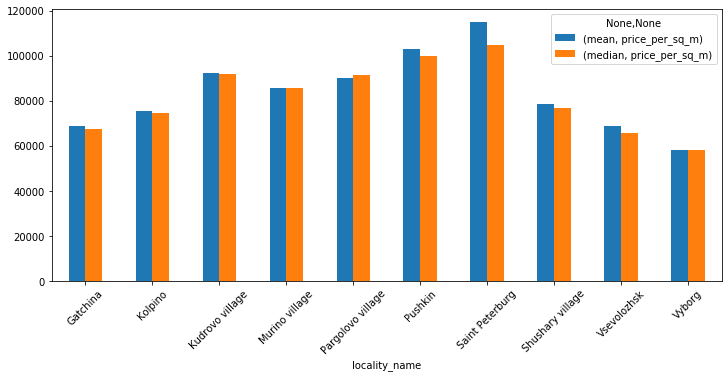

In [ ]:
top_localities = df['locality_name'].value_counts().keys()[0:10]
df.query("locality_name in @top_localities").pivot_table(index='locality_name', values='price_per_sq_m', aggfunc=['mean', 'median']).plot(kind='bar', figsize=(12,5), rot=45)

The top 10 localities with the largest number of ads were selected and analyzed by the average price per square meter. Saint Peterburg has the highest housing prices, while Vyborg has the lowest housing cost.

#### Determining which area is considered to be downtown Saint Petersburg and calculating the average price for each kilometer. How are prices affected by the distance to the downtown area?

In [ ]:
df['cityCenter_km'] = df['cityCenters_nearest'] / 1000

In [ ]:
df['cityCenter_km'] = df['cityCenter_km'].round().astype(int)

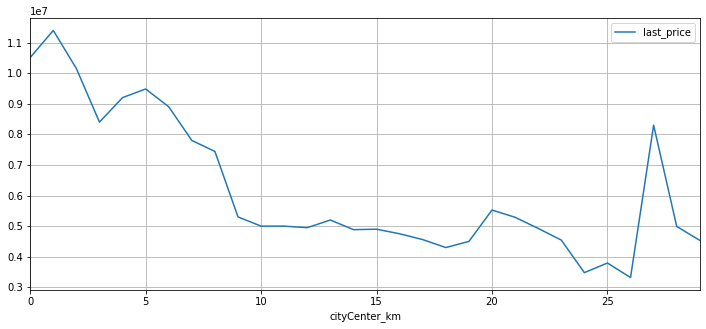

In [ ]:
df.query('locality_name == "Saint Peterburg"').pivot_table(index='cityCenter_km', values='last_price', aggfunc='median').plot(figsize=(12,5), grid=True)

The line plot indicates that the downtown border is at the 8 kilometer mark, since that is where the prices dramatically drop and start stabilizing.

#### Selecting all apartments in the downtown area and examining correlations between the following parameters: total area, price, number of rooms, ceiling height. What factors that affect an apartment’s price?

In [ ]:
df.query('locality_name == "Saint Peterburg" & cityCenter_km <= 8')[['last_price', 'total_area', 'rooms', 'ceiling_height']].describe()

,last_price,total_area,rooms,ceiling_height
count,4.095000e+03,4095.000000,4095.000000,2658.000000
mean,1.424349e+07,90.287314,2.747741,3.131095
std,2.374984e+07,59.331039,1.416493,2.133269
min,1.686000e+06,12.000000,0.000000,2.000000
25%,6.445000e+06,54.850000,2.000000,2.800000
50%,8.945261e+06,75.900000,3.000000,3.000000
75%,1.390000e+07,106.800000,3.000000,3.247500
max,7.630000e+08,900.000000,19.000000,100.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f467628f590>,
      dtype=object)

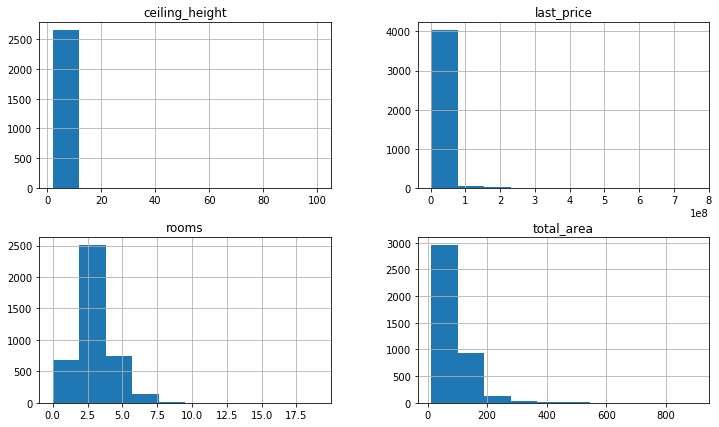

In [ ]:
df.query('locality_name == "Saint Peterburg" & cityCenter_km <= 8')[['last_price', 'total_area', 'rooms', 'ceiling_height']].hist(figsize=(12,7))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4676200890>,
      dtype=object)

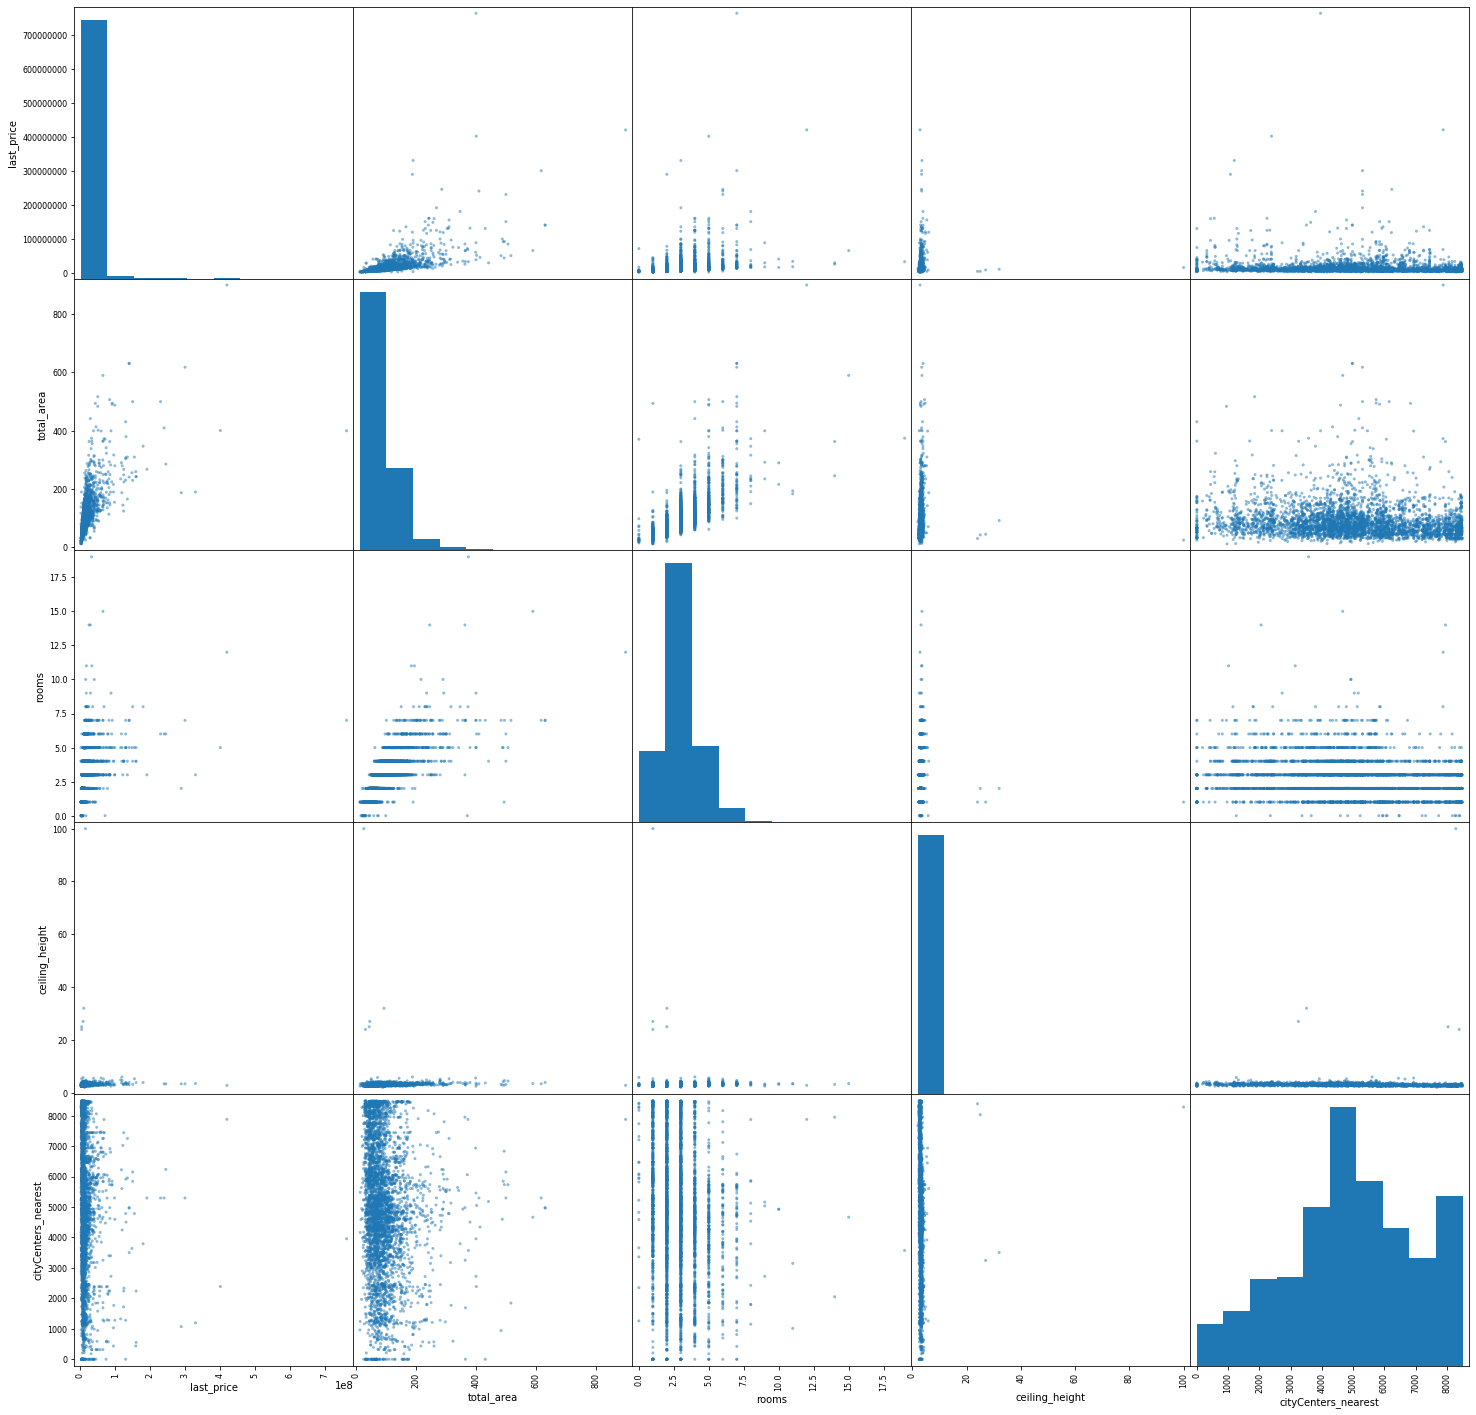

In [ ]:
pd.plotting.scatter_matrix(df.query('locality_name == "Saint Peterburg" & cityCenter_km <= 8')[['last_price', 'total_area', 'rooms', 'ceiling_height', 'cityCenters_nearest']], figsize=(25,25), alpha=0.5)

In [ ]:
df.query('locality_name == "Saint Peterburg" & cityCenter_km <= 8')[['last_price', 'total_area', 'rooms', 'ceiling_height', 'cityCenters_nearest']].corr()

,last_price,total_area,rooms,ceiling_height,cityCenters_nearest
last_price,1.000000,0.641346,0.344400,0.039366,-0.076975
total_area,0.641346,1.000000,0.744513,0.035178,-0.133254
rooms,0.344400,0.744513,1.000000,0.016657,-0.186471
ceiling_height,0.039366,0.035178,0.016657,1.000000,-0.022984
cityCenters_nearest,-0.076975,-0.133254,-0.186471,-0.022984,1.000000


Just like for the entirety of the city, the larger the `total_area` in the downtown area, the greater the `last_price` tends to be. The greater the `rooms` in a listing, the greater the `last_price` tends to be.

`total_area` has the greatest correlation with `last_price` between these three columns.

In [ ]:
df.query('locality_name == "Saint Peterburg" & cityCenter_km <= 8').pivot_table(index='floor_position', values='last_price', aggfunc=['count', 'mean', 'median'])

,count,mean,median
,last_price,last_price,last_price
floor_position,,,
first,435,9.000627e+06,6500000
last,691,1.820071e+07,9000000
other,2969,1.409065e+07,9300000


Just like for the entirety of the city, the higher up an apartment is in a building, the higher the price tends to be.

In [ ]:
df.query('locality_name == "Saint Peterburg" & cityCenter_km <= 8')[['last_price', 'day_published', 'month_published', 'year_published']].corr()

,last_price,day_published,month_published,year_published
last_price,1.000000,0.018855,-0.002714,-0.050292
day_published,0.018855,1.000000,0.033356,-0.006896
month_published,-0.002714,0.033356,1.000000,-0.257573
year_published,-0.050292,-0.006896,-0.257573,1.000000


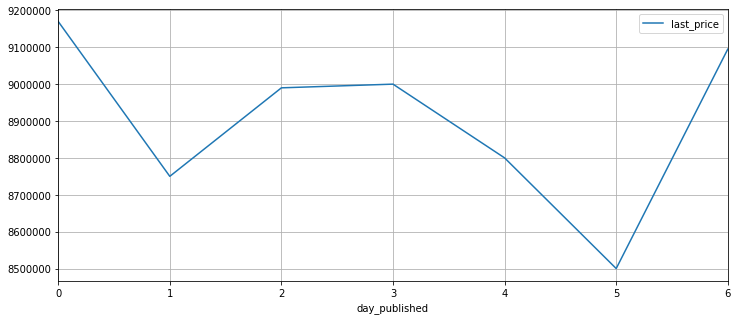

In [ ]:
df.query('locality_name == "Saint Peterburg" & cityCenter_km <= 8').pivot_table(index=['day_published'], values='last_price', aggfunc='median').plot(grid=True, figsize=(12, 5))

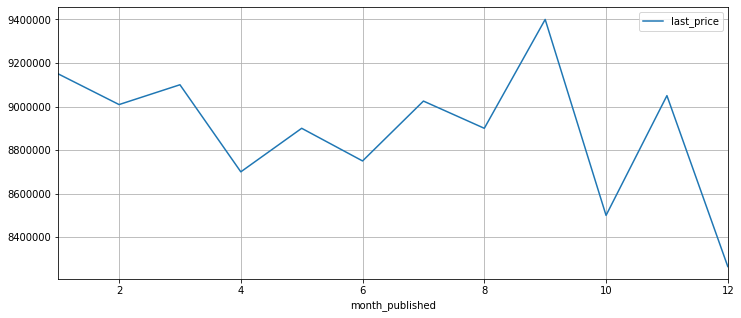

In [ ]:
df.query('locality_name == "Saint Peterburg" & cityCenter_km <= 8').pivot_table(index=['month_published'], values='last_price', aggfunc='median').plot(grid=True, figsize=(12, 5))

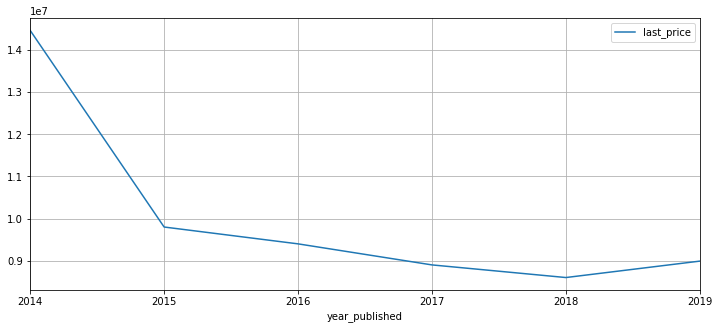

In [ ]:
df.query('locality_name == "Saint Peterburg" & cityCenter_km <= 8').pivot_table(index=['year_published'], values='last_price', aggfunc='median').plot(grid=True, figsize=(12, 5))

The prices downtown dipped around the same time as the entirety of the city. There is little correlation between the price and the days/weeks the listing was posted, just like for the entirety of the city.

### Conclusion

Although downtown Saint Petersburg has the highest housing prices, pricing factors and trends mirror that of the overall dataset. The larger the total area in a listing, the greater the price tends to be. Likewise, the greater the amount of rooms there are in an apartment, the greater the listing price is. The higher up an apartment is in a building, the higher the price is. There was a dip in prices during 2016-2018. A recovery period in prices has begun in 2019.

### Step 5. Overall conclusion

Housing market value trends are consistent across entire dataset and the downtown St. Petersburg area. The sale price is most affected by the total area of the apartment, followed by the amount of rooms and floor location of the building. Housing prices fluctuate uniformly when comparing the downtown Saint Petersburg area with the rest of the dataset as a whole.